In [31]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
# retrieve dataframe from previous work
df = pd.read_csv('../../../../GitHub_Data/Dota2Matches/preparedMatchSkill.csv',index_col='match_id')
df.head()

,Rad_Win,dire_trueskill_mu_mean,dire_trueskill_mu_sum,dire_trueskill_sigma_mean,radiant_trueskill_mu_mean,radiant_trueskill_mu_sum,radiant_trueskill_sigma_mean
match_id,,,,,,,
1636204962,0,25.357769,228.219917,5.307879,24.991777,224.925992,4.645305
1636322679,1,25.429459,152.576754,5.577277,29.280546,175.683275,7.656243
1637385965,0,28.605807,57.211613,4.346619,23.977755,47.955511,7.380554
1637623870,0,27.253514,545.070286,5.717296,24.122732,482.454634,6.343619
1637739731,1,25.028565,400.457043,6.378492,28.637235,458.195754,6.417469


<AxesSubplot:>

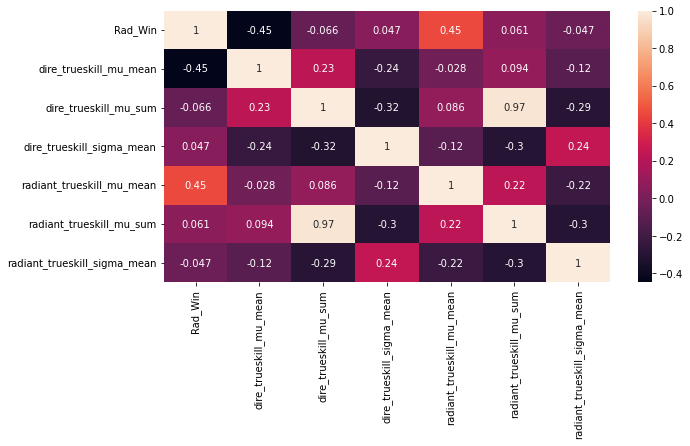

In [34]:
# feature selection
plt.figure(figsize=(10,5))
feature_correlation = df.corr()
sns.heatmap(feature_correlation, annot=True)
#Looks like sum trueskill_mean is the best one, but only .45 overall

In [35]:
df = df[['Rad_Win', 'radiant_trueskill_mu_mean','dire_trueskill_mu_mean']]
df.head()

,Rad_Win,radiant_trueskill_mu_mean,dire_trueskill_mu_mean
match_id,,,
1636204962,0,24.991777,25.357769
1636322679,1,29.280546,25.429459
1637385965,0,23.977755,28.605807
1637623870,0,24.122732,27.253514
1637739731,1,28.637235,25.028565


In [36]:
x_train, x_test, y_train, y_test = train_test_split(df[['radiant_trueskill_mu_mean','dire_trueskill_mu_mean']].to_numpy(), \
     df['Rad_Win'].to_numpy(), train_size=.75)

In [40]:
model = LogisticRegression(solver='saga')
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

<AxesSubplot:>

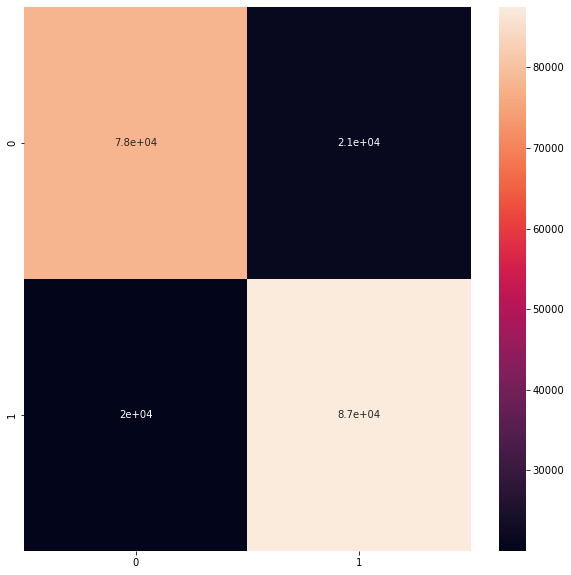

In [41]:
c_matrix = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,10))
sns.heatmap(c_matrix,annot=True)

In [42]:
accuracy = metrics.accuracy_score(y_test,y_predicted)
print(accuracy)

0.7999274731650711


In [ ]:
# I'm not super happy with this.
# Need to dig deeper into the individual choices - and maybe find other things in match setup that can predict outcome